# Insurance Claim Prediction

data set link = https://datahack.analyticsvidhya.com/contest/dataverse/#About

Predict whether the policyholder will file a claim in the next 6 months or not.





# Problem Statement



CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to **optimize the cost of the insurance** by identifying the policyholders who are more likely to claim in the next 6 months. 

**Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months.** The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.





### About the Dataset



You are provided with information on policyholders containing the attributes like policy tenure, age of the car, age of the car owner, population density of the city, make and model of the car, power, engine type, etc and the target variable indicating whether the policyholder files a claim in the next 6 months or not.



Data Dictionary



You are provided with 3 files - train.csv, test.csv, and sample_submission.csv



Train and Test Set



The train and test set contains information about different insurance policy holders. The train set includes the target variable is_claim whereas in the test set, you need to predict the target variable is_claim.



#### Variable - Description

* policy_id - Unique identifier of the policyholder

* policy_tenure - Time period of the policy

* age_of_car - Normalized age of the car in years

* age_of_policyholder - Normalized age of policyholder in years

* area_cluster - Area cluster of the policyholder

* population density - Population density of the city (Policyholder City)

* make - Encoded Manufacturer/company of the car

* segment - Segment of the car (A/ B1/ B2/ C1/ C2)

* model - Encoded name of the car

* fuel_type - Type of fuel used by the car

* max_torque - Maximum Torque generated by the car (Nm@rpm)

* max_power - Maximum Power generated by the car (bhp@rpm)

* engine_type - Type of engine used in the car

* airbags - Number of airbags installed in the car

* is_esc - Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.

* is_adjustable_steering - Boolean flag indicating whether the steering wheel of the car is adjustable or not.

* is_tpms - Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.

* is_parking_sensors - Boolean flag indicating whether parking sensors are present in the car or not.

* is_parking_camera - Boolean flag indicating whether the parking camera is present in the car or not.

* rear_brakes_type - Type of brakes used in the rear of the car

* displacement - Engine displacement of the car (cc)

* cylinder - Number of cylinders present in the engine of the car

* transmission_type - Transmission type of the car

* gear_box - Number of gears in the car

* steering_type - Type of the power steering present in the car

* turning_radius - The space a vehicle needs to make a certain turn (Meters)

* length - Length of the car (Millimetre)

* width - Width of the car (Millimetre)

* height - Height of the car (Millimetre)

* gross_weight - The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)

* is_front_fog_lights - Boolean flag indicating whether front fog lights are available in the car or not.

* is_rear_window_wiper - Boolean flag indicating whether the rear window wiper is available in the car or not.

* is_rear_window_washer - Boolean flag indicating whether the rear window washer is available in the car or not.

* is_rear_window_defogger - Boolean flag indicating whether rear window defogger is available in the car or not.

* is_brake_assist - Boolean flag indicating whether the brake assistance feature is available in the car or not.

* is_power_door_lock - Boolean flag indicating whether a power door lock is available in the car or not.

* is_central_locking - Boolean flag indicating whether the central locking feature is available in the car or not.

* is_power_steering - Boolean flag indicating whether power steering is available in the car or not.

* is_driver_seat_height_adjustable - Boolean flag indicating whether the height of the driver seat is adjustable or not.

* is_day_night_rear_view_mirror - Boolean flag indicating whether day & night rearview mirror is present in the car or not.

* is_ecw - Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.

* is_speed_alert - Boolean flag indicating whether the speed alert system is available in the car or not.

* ncap_rating - Safety rating given by NCAP (out of 5)

* is_claim - Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.




 #### Submission File Format



The solution file should follow a format similar to that of the sample submission file. sample_submission.csv contains 2 variables - policy_id and is_claim.


Variable

Description

policy_id

Unique identifier of the policyholder

is_claim

Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not




Evaluation metric



The evaluation metric for this hackathon would be F1 score.




Public and Private Split



Test data is further divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,\
AdaBoostClassifier,StackingClassifier,VotingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,\
cohen_kappa_score,f1_score,log_loss,accuracy_score
import statsmodels.api as sma
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [61]:
train = pd.read_csv(r"E:\Case Stady-1\train_qWM28Yl.csv")
test = pd.read_csv(r"E:\Case Stady-1\test_zo1G9sv.csv")
submission = pd.read_csv(r"E:\Case Stady-1\sample_submission_KvRh9Sx.csv")

In [62]:
pd.set_option('display.max_columns',100)
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [63]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [64]:
train.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [65]:
train.shape,test.shape,combined.shape

((58592, 44), (39063, 43), (97655, 47))

In [66]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     97655 non-null  float64
 1   age_of_car                        97655 non-null  float64
 2   age_of_policyholder               97655 non-null  float64
 3   area_cluster                      97655 non-null  object 
 4   population_density                97655 non-null  int64  
 5   make                              97655 non-null  int64  
 6   segment                           97655 non-null  object 
 7   model                             97655 non-null  object 
 8   fuel_type                         97655 non-null  object 
 9   engine_type                       97655 non-null  object 
 10  airbags                           97655 non-null  int64  
 11  is_esc                            97655 non-null  object 
 12  is_a

In [67]:
train.isnull().sum()
# No missing value in train dataset

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [68]:
test.isnull().sum()
# No missing value in Test Dataset

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

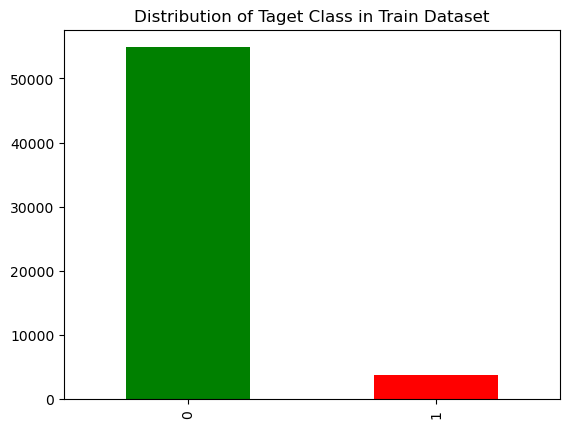

In [69]:
train.is_claim.value_counts().plot(kind='bar',color=['green','red'])
plt.title('Distribution of Taget Class in Train Dataset')
plt.show()
# The distribution of Target class is imbalanced approx 93% goes to 0(Not claim category) and 7% goes to 1(Claim Category)

* **Combine both train and test dataset for further Analysis.**

In [70]:
combined = pd.concat([train,test],ignore_index=True)

In [71]:
combined.nunique()

policy_id                           97655
policy_tenure                       97655
age_of_car                             57
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [72]:
combined.describe()
# age_of_car,age_of_policyholder is Normalized means it is not the orginal data.

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,58592.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,1.759664,0.063968
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,1.388415,0.244698
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


In [73]:
combined.describe(include=object)

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655,97655
unique,97655,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,22815,30363,24988,34125,29503,29503,24988,66997,59044,74272,93632,59466,74272,63573,56037,56394,69386,69386,63489,53485,70733,70733,95721,56993,60621,70733,97056


#### Obseravation from Numerical Columns Describe

* policy_tenure scale has not given,The maximum population a city have is 73430 and Minimum is 290.make is refere to manufactured/company of the car which is encoded(1,2,3,4,5).A car have maximum 6 number of airbags installed and minimum 1. Maximum 4 cylinders available in a engine of the car.The average n_cap rating is nearer to 2.


* **Obseravation from Categorical Columns Describe**



* The top area_cluster is C8,Means most of the policy holder are belongs to this cluster.

* The top/maximum used/preferd segment of the car is B2

* The most used model of the car is M1(which is encoded)

* Most of the cars are Petrol variant in terms of fule type.

* The most of the car having max_torque is 113Nm@4400rpm

* The most of the car having engine_type F8D Petrol Engine



# Univariate Analysis

In [74]:
num_cols = combined.select_dtypes(include=np.number).columns
cat_cols = combined.select_dtypes(include='object').columns

In [75]:
num_cols
# Make is categorical columns,n_cap_rating is also categorical variable,is_claim is also categorical variable

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [76]:
cat_cols

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [77]:
combined.nunique()

policy_id                           97655
policy_tenure                       97655
age_of_car                             57
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [78]:
len(num_cols),len(cat_cols)

(16, 28)

### Numerical Features

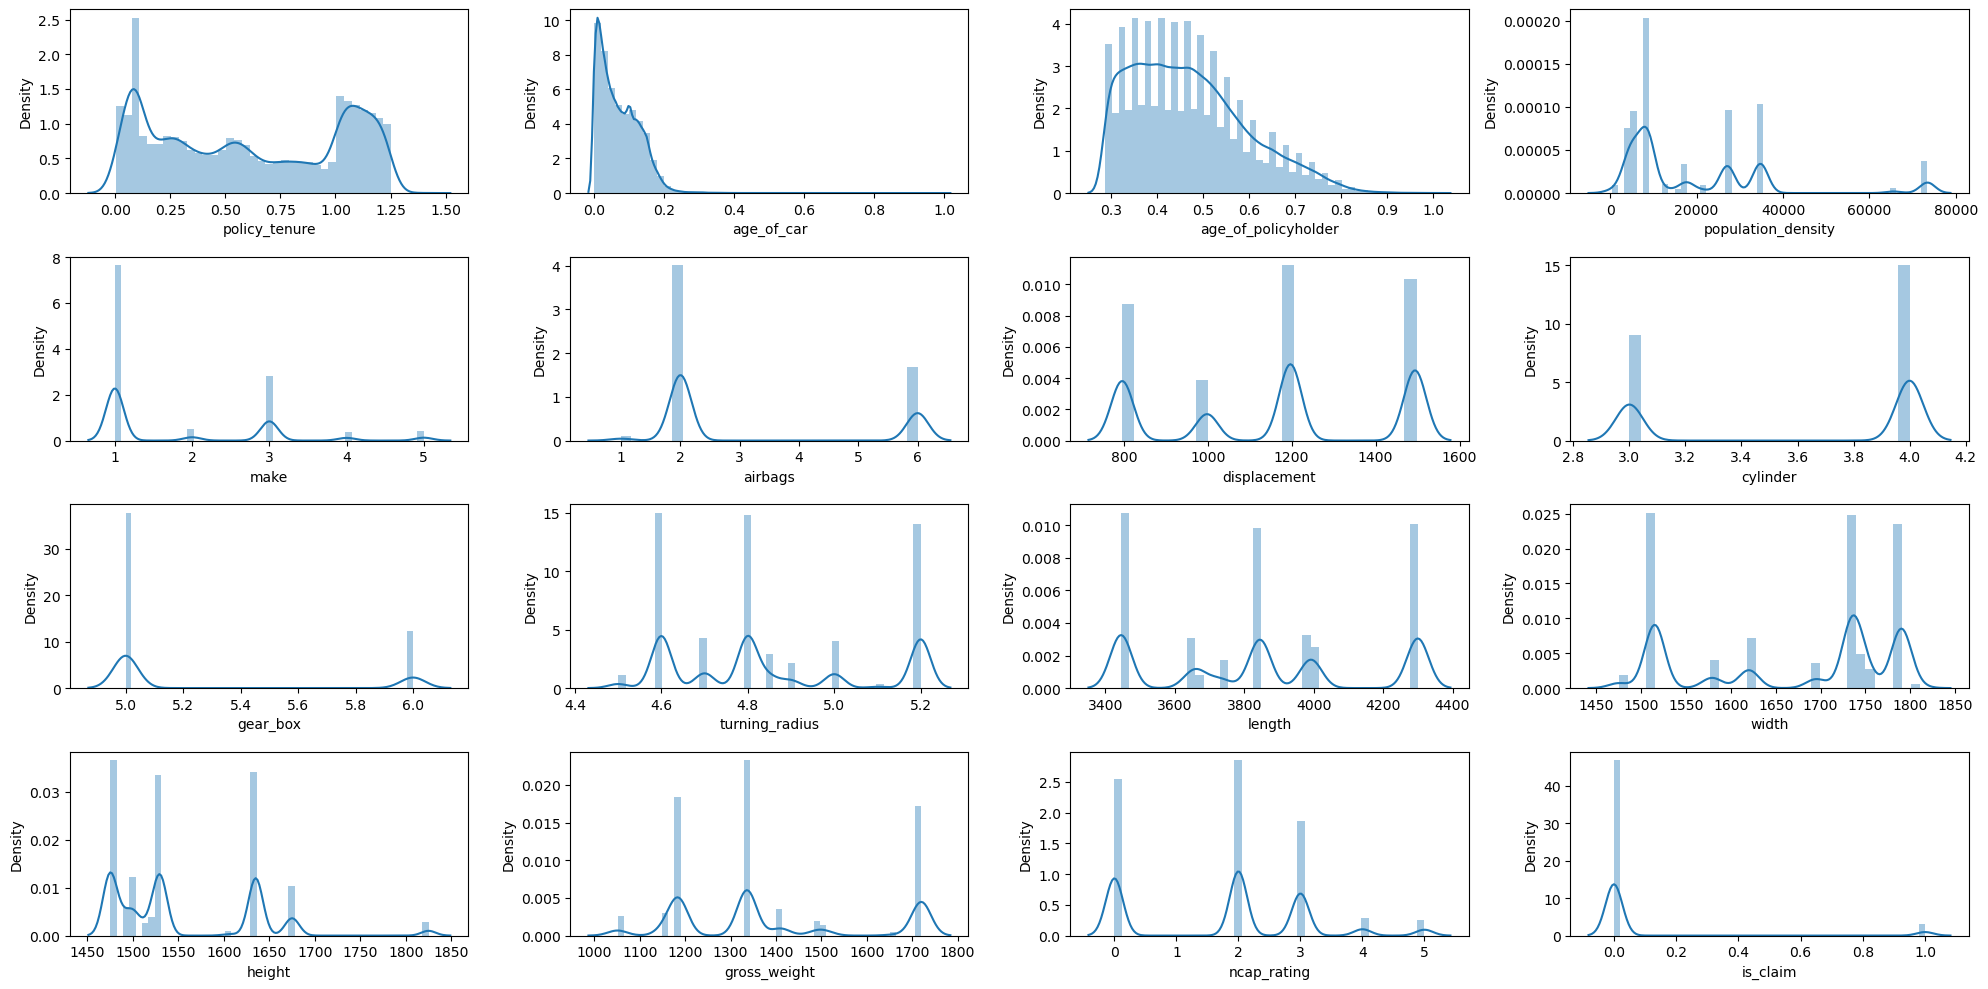

In [79]:
# for num columns lets Apply Distplot 
nrows = 4
ncols = 4
repeter = 1

plt.figure(figsize=(20,10))
for i in num_cols:
    plt.subplot(nrows,ncols,repeter)
    sns.distplot(combined.loc[:,i])
    repeter+=1
plt.tight_layout()
plt.show()

# 

* **Observation From The above plot**

* age_of_car,population_density,gear_box,height are higly positive skewed
* The policy_tenure is uniformly distributed as well as age_of_policyholder also
* most of the car has 5 gear_box in it.

In [80]:
cat_cols

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

### Categorical Features

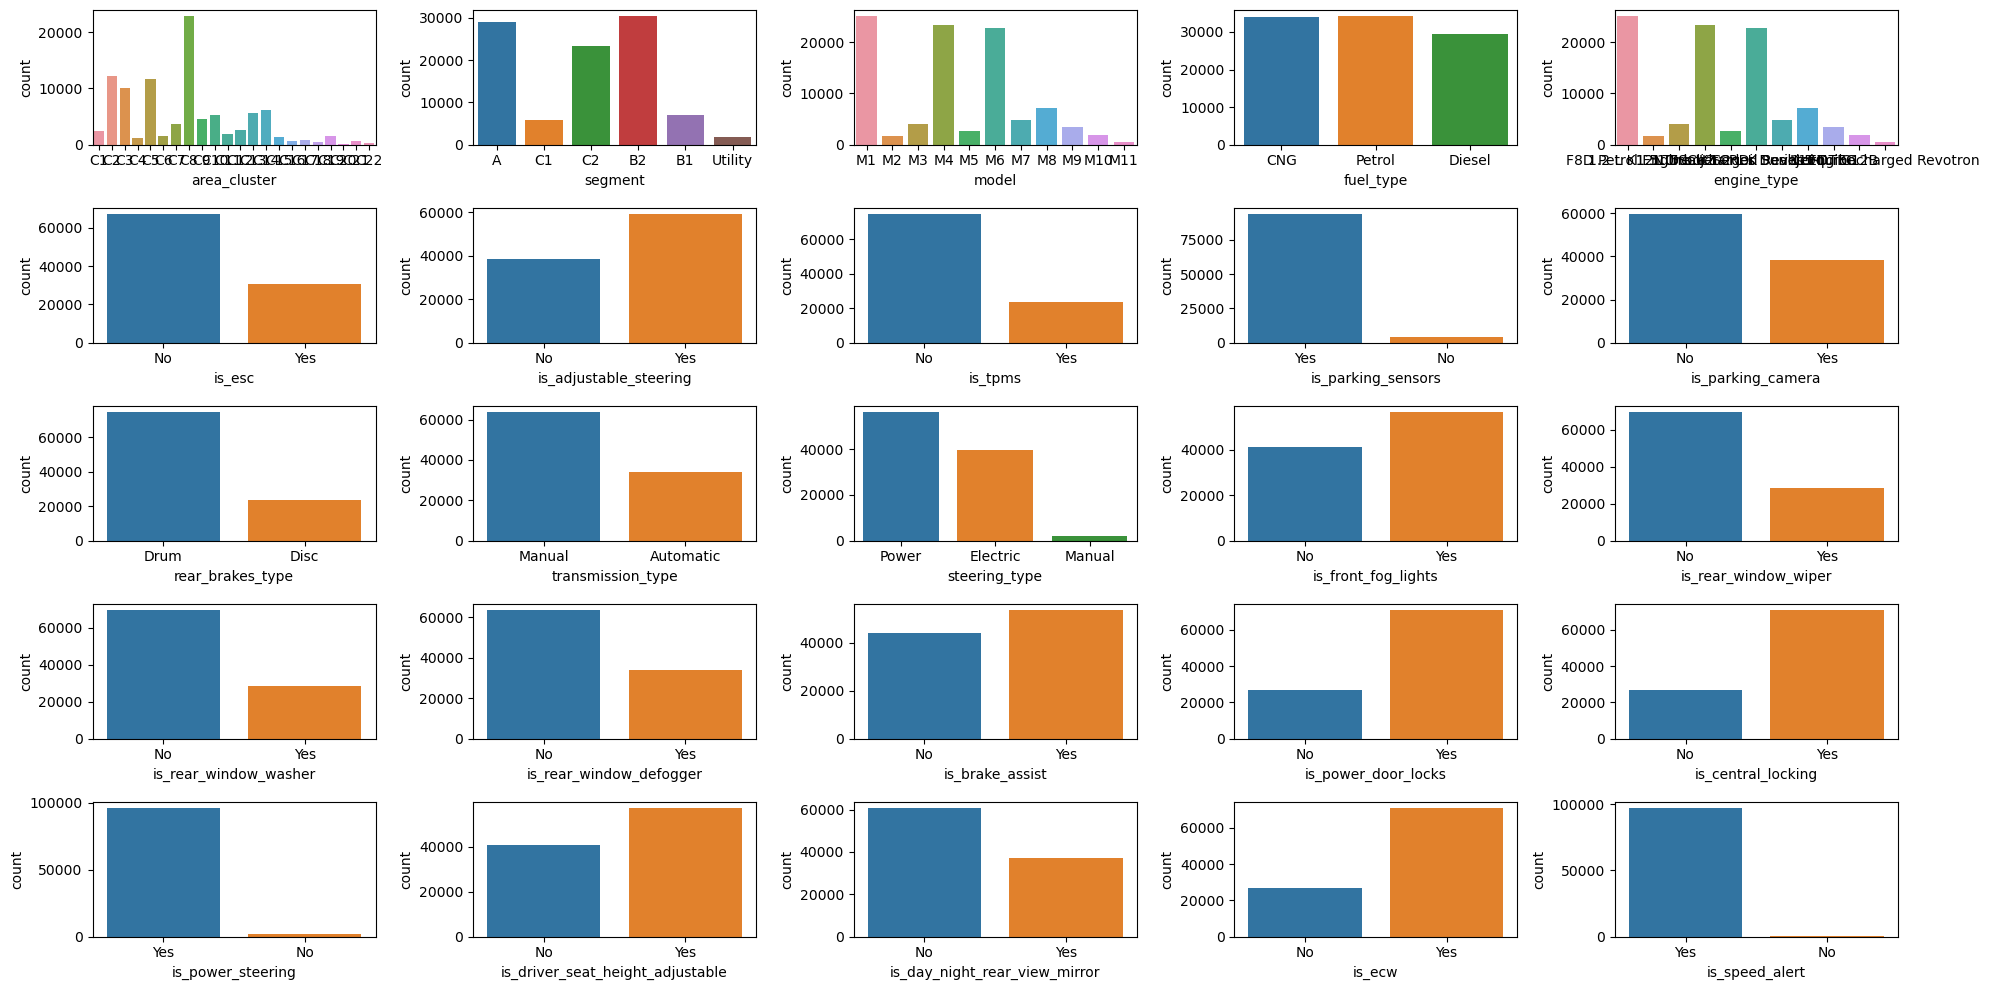

In [81]:
cat_vars = [ 'area_cluster', 'segment', 'model', 'fuel_type',
        'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']
nrows = 5
ncols = 5
repeter = 1

plt.figure(figsize=(20,10))
for i in cat_vars:
    plt.subplot(nrows,ncols,repeter)
    sns.countplot(combined.loc[:,i])
    repeter+=1
plt.tight_layout()
plt.show()

##### Observation From above plot:-
* Most of the car belongs to engine_type F8D petrol engine type
* Most of the car belongs to B2 segment
* M1 model varaint car are available the most
* Most of the vehicle is of CNG,petrol fuel type
* Most of the car having no electronic stability control
* Most of the car having adjustable steering
* Most of the car not having tyre pressure monitoring system(tpms)
* Most of the car having parking sensor
* Most of the car not having parking camera
* Most of the car having drum type rear breaks
* Manual transmission type car are available the most
* Power steering type car are the most

## Bi-Veriate Analysis

## Numerical Vs Categorical (TGT)

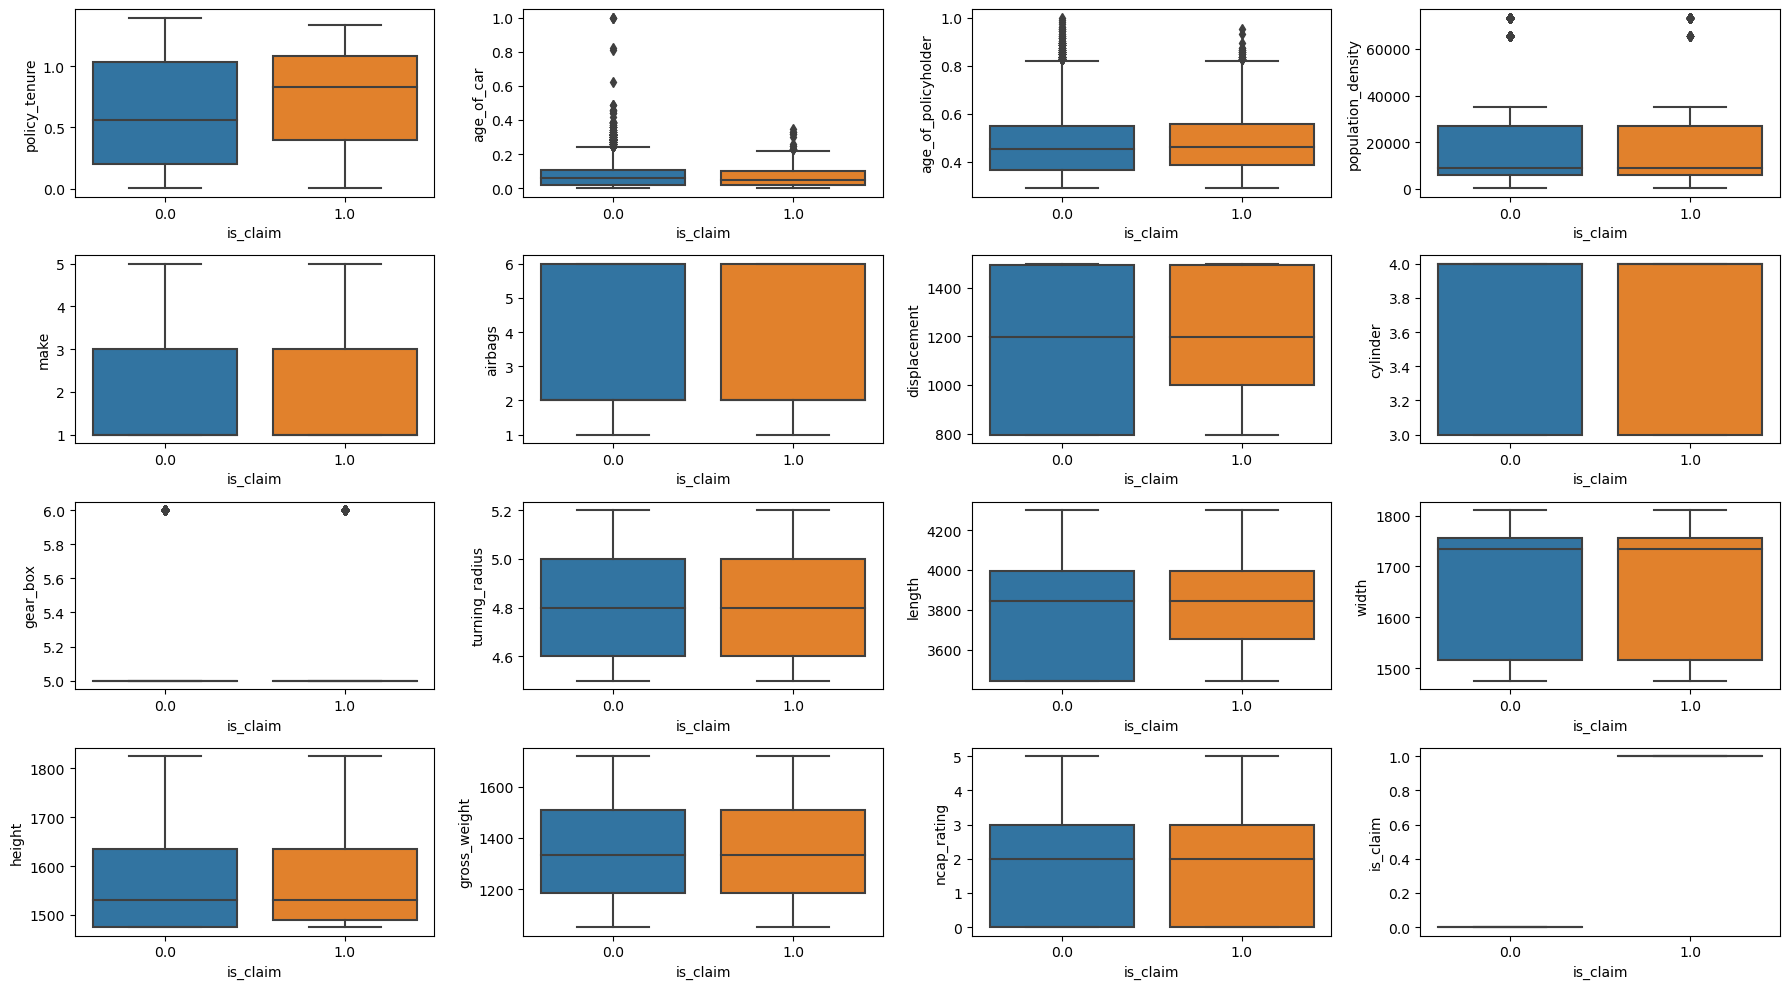

In [82]:
t = 1
plt.figure(figsize=(18,10))
for i in num_cols:
    plt.subplot(4,4,t)
    sns.boxplot(combined.is_claim,combined.loc[:,i])
    t+=1
plt.tight_layout() 
plt.show()

#### Observation:
* The probability/chance of claim is higher if the policy tenure is high
* age_of_car,age_of_policy_holder,population_density,airbags,cylinder,height,width,turning_radius,gross_weight and is_claim not any relation can be seen from the plot

#### Lets apply Statistical Test to check which features having relation with Target from the above plot

In [83]:
# Apply the Statistical Test

# Two Sample Independent T Test
# H0: That the Feature Have no effect on Target or vice versa
# Ha: That the Feature Have effect on Target or vice versa

In [84]:
imp_feats = []
for i in num_cols:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    teststats,pvalue = stats.ttest_ind(zero,one,alternative='two-sided')
    
    if pvalue<0.05:
        imp_feats.append(i)
print(imp_feats)

# These columns are relation with target variable

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'is_claim']


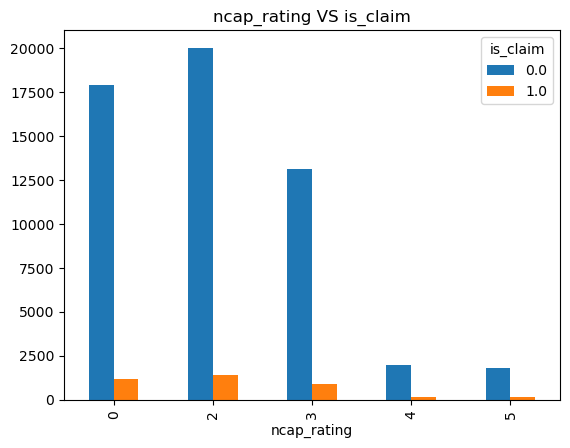

In [85]:
# Ncap rating vs target

pd.crosstab(combined.ncap_rating,combined.is_claim).plot(kind='bar')
plt.title('ncap_rating VS is_claim')
plt.show()

# We can infer that cars that have the lowest ncap rating are more prone to the Claims...

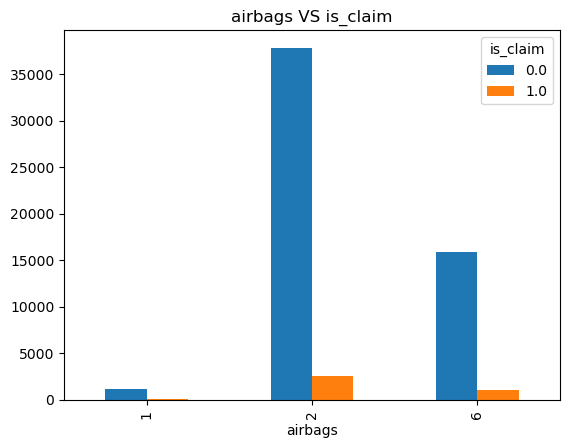

In [86]:
# Airbags vs taget

pd.crosstab(combined.airbags,combined.is_claim).plot(kind='bar')
plt.title('airbags VS is_claim')
plt.show()

In [87]:
# Lets check the realtion of ncap_rating with Target var

# Ho: Two variables are Independent

# Ha: Two variables are Not Independent

stats.chi2_contingency(pd.crosstab(combined.airbags,combined.is_claim))

# As the pvalue is >0.05 so fail to reject the Ho,Two varible are Independent

(0.6210927084192801,
 0.733046343840305,
 2,
 array([[ 1131.6629574 ,    77.3370426 ],
        [37839.10260786,  2585.89739214],
        [15873.23443474,  1084.76556526]]))

In [88]:
#  Categorical columns VS Target variable (Chi2 test)
cat_feats = []
for i in cat_cols:
    tbl = pd.crosstab(combined.loc[:,i],combined.is_claim)
   
    teststats,pvalue,dof,exp_freq = stats.chi2_contingency(tbl)
    
    if pvalue<0.05:
        cat_feats.append(i)
print(cat_feats)

# These are the best columns in feature

['area_cluster', 'segment', 'model', 'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


##  Feature Engineering

In [89]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [90]:
combined[['Nm_torque','rpm_torque']]=combined.max_torque.str.split("@",expand=True)

In [91]:
combined[['hp','rpm_power']]=combined.max_power.str.split("@",expand=True)

In [92]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm


In [93]:
combined['rpm_torque'] = combined.rpm_torque.apply(lambda x:float(x[:-3]))
combined['rpm_power'] = combined.rpm_power.apply(lambda x:float(x[:-3]))
combined['hp'] = combined.hp.apply(lambda x:float(x[:-3]))
combined['Nm_torque'] = combined.Nm_torque.apply(lambda x:float(x[:-2]))

In [94]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0


In [95]:
cat_vars

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

* **Lets map 1 to "Yes" and 0 to "NO"**

In [96]:
for i in cat_vars:
    if i.startswith('is')&(i!='is_claim'):
        mapp = {'Yes':1,'No':0}
        combined[i] = combined[i].map(mapp)

In [97]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0


In [98]:
# Per Unit torque...
# Per unit power.....
combined["per_unit_torque"]=combined.rpm_torque/combined.Nm_torque
combined["per_unit_power"]=combined.rpm_power/combined.hp

In [99]:
combined["age_prop"]=combined.age_of_car/combined.age_of_policyholder

In [100]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333


####  Lets Create Some More Magical Features from the existing columns

In [101]:
# Count of Policy ID using Area Claster
combined['magic1']=combined.groupby("area_cluster")['policy_id'].transform('nunique')

In [102]:
# Let's apply Statistical test in column
zero = combined.loc[combined.is_claim==0,'magic1']
one = combined.loc[combined.is_claim==1,'magic1']

stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-4.251501393229285, pvalue=2.1267052931968336e-05)

In [103]:
# Count of Policies in megical pop Density
combined['magic2']=combined.magic1/combined.population_density

In [104]:
# Let's apply Statistical test in column
zero = combined.loc[combined.is_claim==0,'magic2']
one = combined.loc[combined.is_claim==1,'magic2']

stats.ttest_ind(zero,one)


Ttest_indResult(statistic=-3.7411060267064706, pvalue=0.00018338678692374335)

In [105]:
# combined.groupby('policy_id')['policy_tenure'].transform()

In [106]:
# Finding the Summary Statistict of policy tenure using area clauster
combined['magic3']=combined.groupby('area_cluster')['policy_tenure'].transform('min')
combined['magic4']=combined.groupby('area_cluster')['policy_tenure'].transform('max')
combined['magic5']=combined.groupby('area_cluster')['policy_tenure'].transform('mean')
combined['magic6']=combined.groupby('area_cluster')['policy_tenure'].transform('median')

In [107]:
# Let's apply Statistical test in column
list_feats = ['magic3','magic4','magic5','magic6']

for i in list_feats:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    teststats,pvalue = stats.ttest_ind(zero,one)
    print("Pvalue:",i,pvalue)

Pvalue: magic3 0.01517380140799255
Pvalue: magic4 0.1896759377985605
Pvalue: magic5 2.5550496912611606e-07
Pvalue: magic6 2.4634736641066477e-07


In [108]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [109]:
combined.transmission_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [110]:
combined["transmission_type"]=np.where(combined.transmission_type =="Manual",1,0)

In [111]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,1.262558,0.493563,0.436682
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,0,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,1.247390,0.509921,0.457736
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,0,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,1.396641,0.520588,0.487713


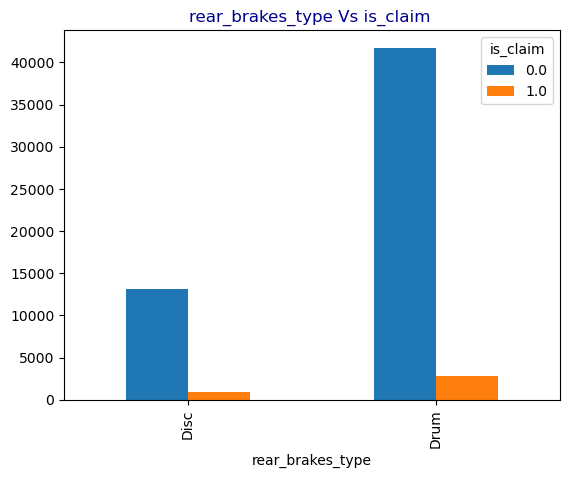

In [112]:
pd.crosstab(combined.rear_brakes_type,combined.is_claim).plot(kind = 'bar')
plt.title('rear_brakes_type Vs is_claim ',color='darkblue')
plt.show()

In [113]:
combined["rear_brakes_type"]=np.where(combined.rear_brakes_type =="Drum",1,0)

In [114]:
combined.steering_type.value_counts()

Power       56037
Electric    39684
Manual       1934
Name: steering_type, dtype: int64

In [115]:
# ! pip install category_encoders

In [116]:
# Drop the column
combined.drop(['policy_id','max_torque', 'max_power','magic4'],axis = 1,inplace=True)

In [117]:
# Split the Data in Train and Test
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [118]:
train.shape,newtrain.shape,test.shape,newtest.shape

((58592, 44), (58592, 53), (39063, 43), (39063, 53))

In [119]:
# Drop the target variable from train and test
X = newtrain.drop('is_claim',axis=1)
newtest = newtest.drop('is_claim',axis=1)
y = newtrain.is_claim

In [120]:
mycols = ['area_cluster','segment','model','fuel_type','engine_type','steering_type']

import category_encoders as ce
tgt = ce.TargetEncoder(cols=mycols)

newx = tgt.fit_transform(X,y)
test_encoded = tgt.transform(newtest)

In [121]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,1,1197,4,0,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,1,999,3,0,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713


In [122]:
# Create unit_weight

newx['per_unit_vol'] = newx.gross_weight/(newx.length*newx.width*newx.height)
test_encoded['per_unit_vol'] = test_encoded.gross_weight/(test_encoded.length*test_encoded.width*test_encoded.height)

In [123]:
test_encoded.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6,per_unit_vol
58592,0.341732,0.00,0.586538,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.000000,10172,2.495584,0.002753,0.493563,0.436682,1.539304e-07
58593,0.307241,0.13,0.442308,0.069870,8794,1,0.068581,0.068162,0.066384,0.068162,2,0,1,0,1,0,1,1197,4,1,5,0.066873,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.293913,22815,2.594383,0.002740,0.745384,0.898663,1.307959e-07


In [124]:
scale = ['policy_tenure','population_density','displacement','length','width','height','gross_weight',
        'Nm_torque','rpm_torque','hp','rpm_power','per_unit_torque','per_unit_power','magic1','magic3',
        'magic5','magic6']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in scale:
    newx.loc[:,i] = sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    test_encoded.loc[:,i] = sc.fit_transform(pd.DataFrame(test_encoded.loc[:,i]))

<AxesSubplot:>

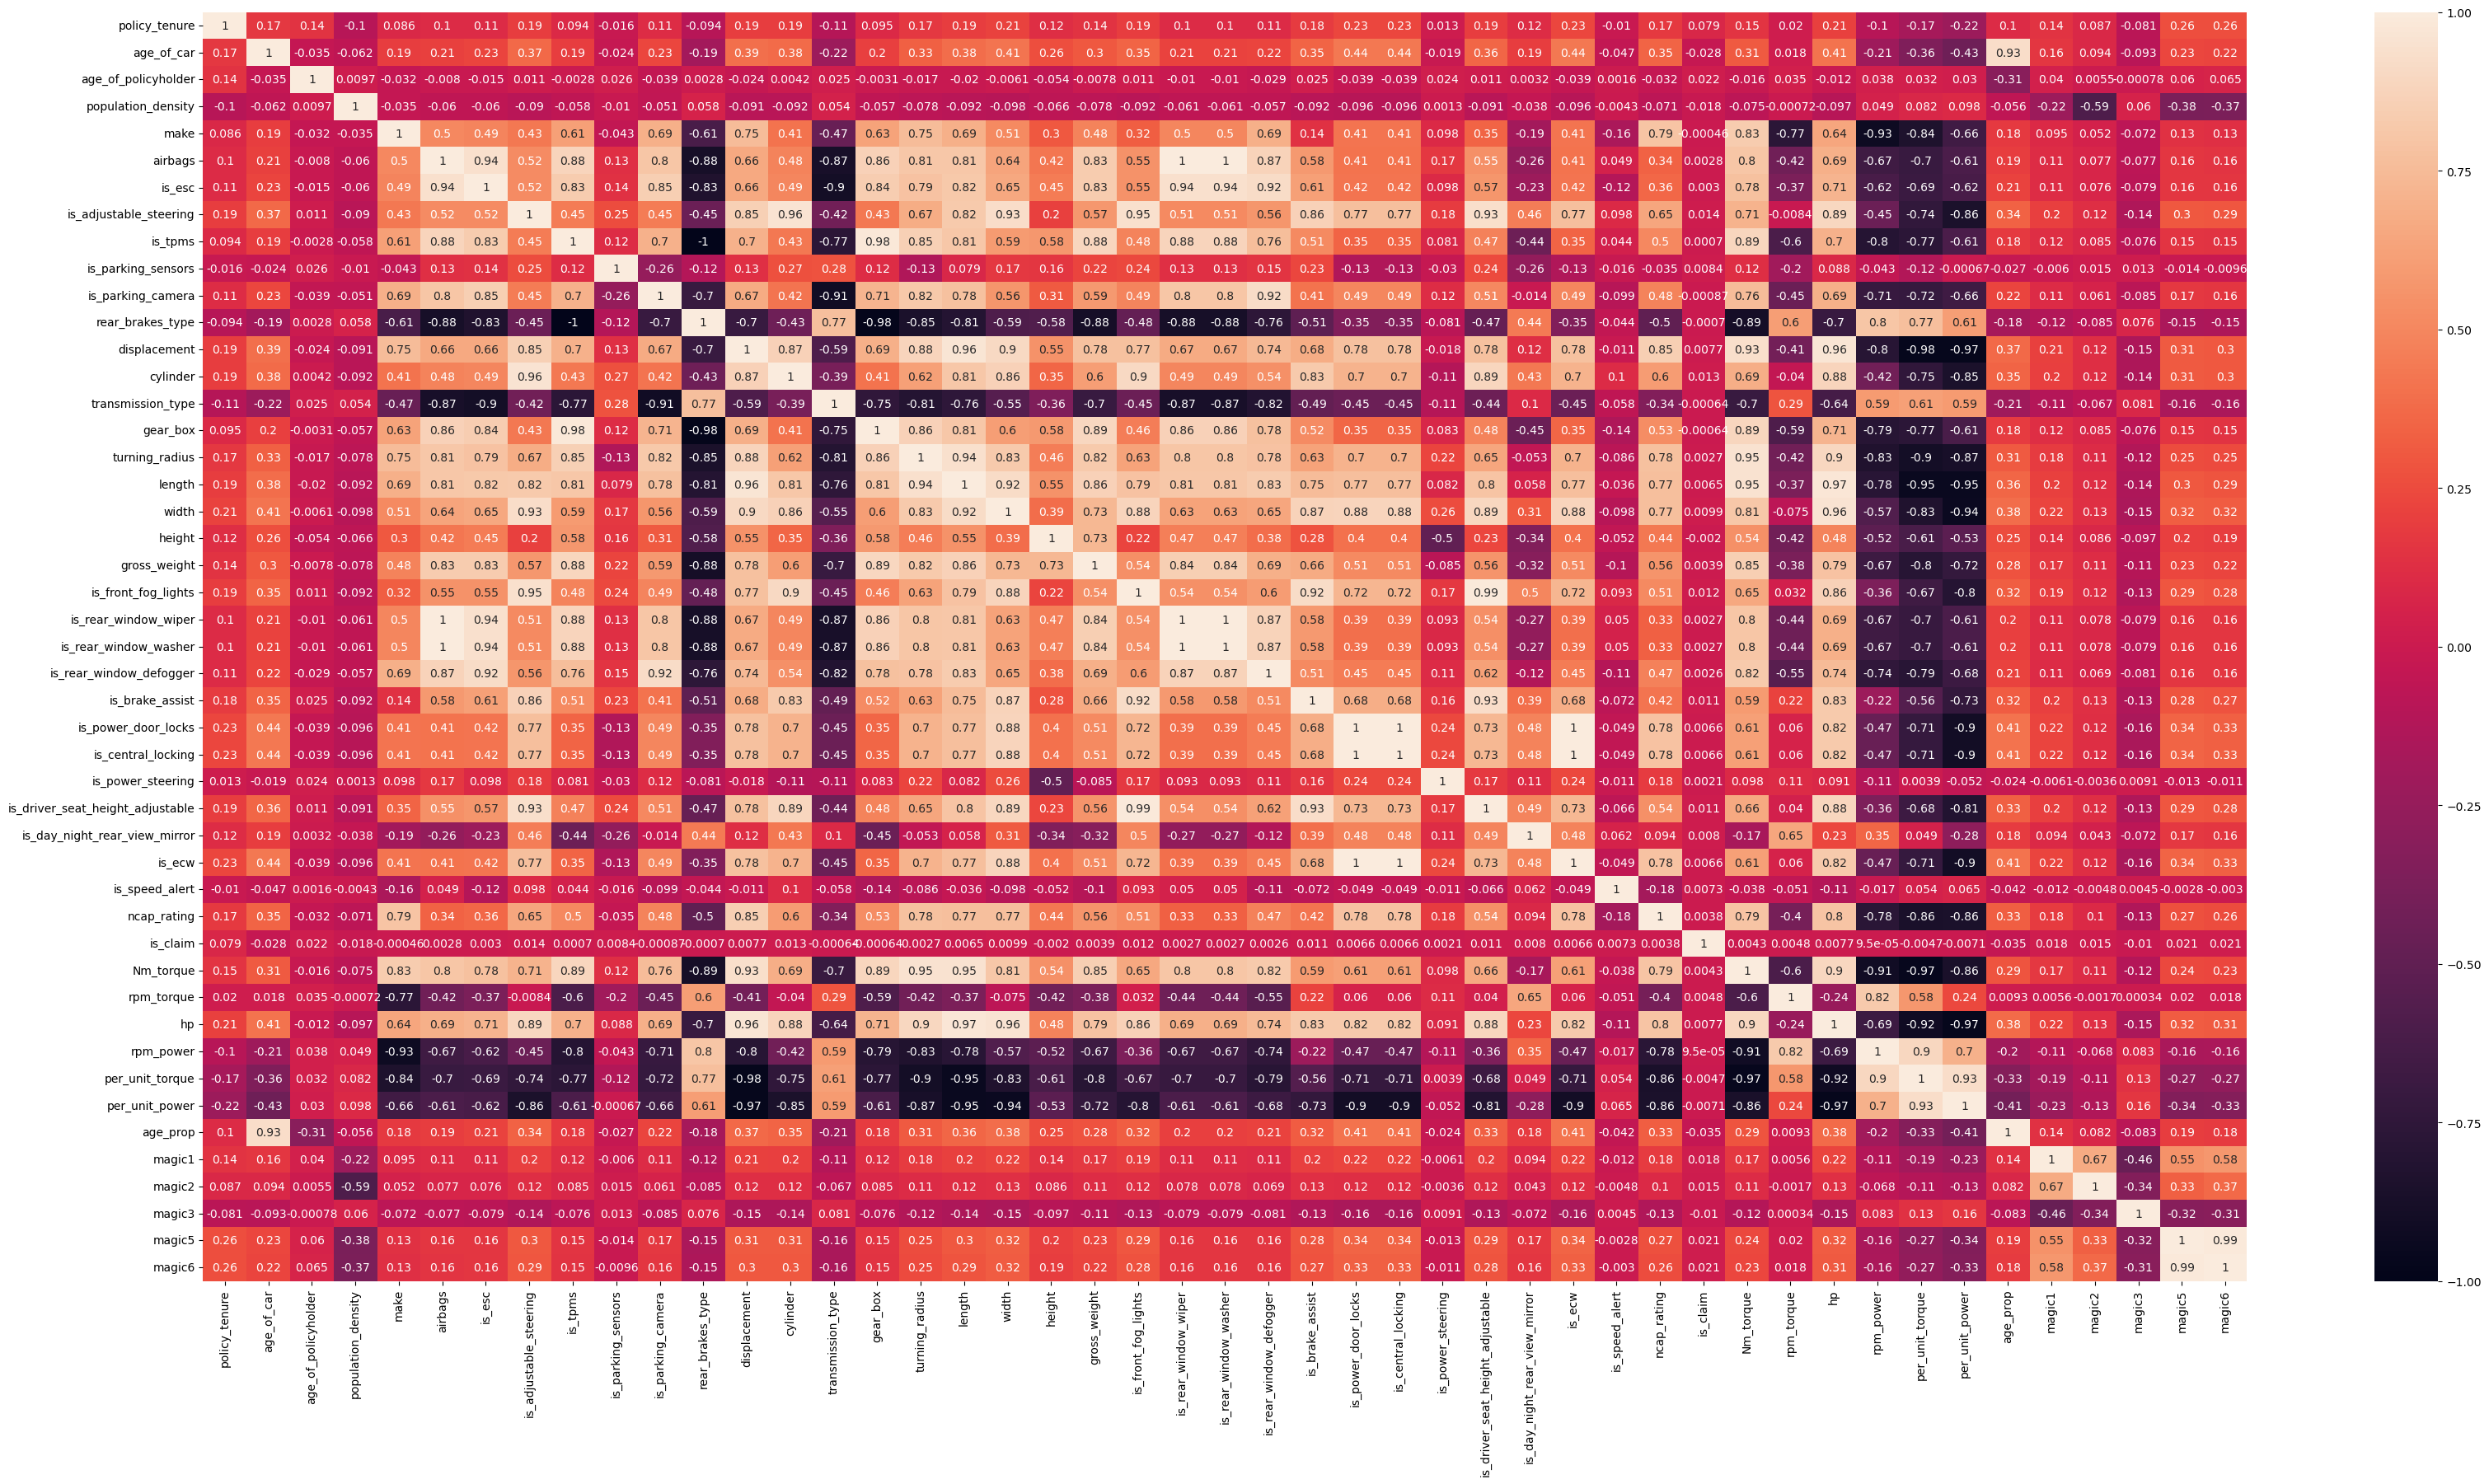

In [125]:
plt.figure(figsize=(40,20))
sns.heatmap(newtrain.corr(),vmin=-1,vmax=1,annot=True)

In [126]:
# Check the Multicolinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
li=[]
for i in range(newx.shape[1]):
    vif=variance_inflation_factor(newx.values,i)
    li.append(vif)
pd.DataFrame({'Features':newx.columns,'vif':li}).sort_values(by=['vif'],ascending=False)
# As i can see there is high multicolinearity in the dataset

,Features,vif
26,gross_weight,inf
35,is_driver_seat_height_adjustable,inf
25,height,inf
27,is_front_fog_lights,inf
28,is_rear_window_wiper,inf
29,is_rear_window_washer,inf
30,is_rear_window_defogger,inf
31,is_brake_assist,inf
32,is_power_door_locks,inf
33,is_central_locking,inf


# Building Machine Learning Models

### Base Model

In [129]:
# train test split(70:30)
xtrain,xtest,ytrain,ytest=train_test_split(newx,y,stratify=y,random_state=12,test_size=0.3)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((41014, 53), (41014,), (17578, 53), (17578,))

In [130]:
xtrain_c=sma.add_constant(xtrain)
xtest_c=sma.add_constant(xtest)
base_model=sma.OLS(ytrain,xtrain_c).fit()
base_model.summary()
# As there is high mutlicolinearity the base logit model is unable to catch the pattern correctly

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               is_claim   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     17.38
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           3.83e-67
Time:                        18:44:06   Log-Likelihood:                -271.94
No. Observations:               41014   AIC:                             589.9
Df Residuals:                   40991   BIC:                             788.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             5.214e+06   1.12e+08      0.047      0.963   -2.14e+08    2.24e+08
policy_tenure                        0.0193      0.001     15.061      0.000       0.017       0.022
age_of_car                          -0.0815      0.083     -0.978      0.328      -0.245       0.082
age_of_policyholder                  0.0065      0.015      0.435      0.664      -0.023       0.036
area_cluster                         0.7888      0.155      5.083      0.000       0.485       1.093
population_density                   0.0005      0.002      0.292      0.770      -0.003       0.004
make                              1.723e+07   3.69e+08      0.047      0.963   -7.06e+08     7.4e+08
segment                           1.828e+06   3.91e+07      0.047      0.963   -7.49e+07    7.85e+07
model                              6.33e+05   1.36e+07      0.047      0.963   -2.59e+07    2.72e+07
fuel_type                         2.757e+06    5.9e+07      0.047      0.963   -1.13e+08    1.18e+08
engine_type                       6.575e+05   1.41e+07      0.047      0.963   -2.69e+07    2.82e+07
airbags                            3.96e+07   8.48e+08      0.047      0.963   -1.62e+09     1.7e+09
is_esc                           -1.647e+07   3.53e+08     -0.047      0.963   -7.08e+08    6.75e+08
is_adjustable_steering           -6.799e+07   1.46e+09     -0.047      0.963   -2.92e+09    2.79e+09
is_tpms                           2.099e+07   4.49e+08      0.047      0.963    -8.6e+08    9.02e+08
is_parking_sensors                 3.06e+07   6.55e+08      0.047      0.963   -1.25e+09    1.31e+09
is_parking_camera                 1.351e+07   2.89e+08      0.047      0.963   -5.53e+08     5.8e+08
rear_brakes_type                 -2.051e+07   4.39e+08     -0.047      0.963   -8.81e+08     8.4e+08
displacement                     -4.644e+07   9.94e+08     -0.047      0.963      -2e+09     1.9e+09
cylinder                          1.184e+08   2.53e+09      0.047      0.963   -4.85e+09    5.09e+09
transmission_type                -2.192e+07   4.69e+08     -0.047      0.963   -9.42e+08    8.98e+08
gear_box                          -3.82e+07   8.18e+08     -0.047      0.963   -1.64e+09    1.56e+09
steering_type                    -9.731e+05   2.08e+07     -0.047      0.963   -4.18e+07    3.99e+07
turning_radius                   -1.062e+08   2.27e+09     -0.047      0.963   -4.56e+09    4.35e+09
length                            -1.19e+07   2.55e+08     -0.047      0.963   -5.11e+08    4.87e+08
width                            -2.394e+07   5.13e+08     -0.047      0.963   -1.03e+09    9.81e+08
height                            2.142e+07   4.59e+08      0.047      0.963   -8.78e+08     9.2e+08
gross_weight                     -1.959e+07    4.2e+0

In [133]:
# Lets check the accuracy of base logit Model
y_pred_logit=np.where(base_model.predict(xtest_c)>0.5,1,0)
print('accuracy:',accuracy_score(ytest,y_pred_logit))
print('f1_score:',f1_score(ytest,y_pred_logit))
print(classification_report(ytest,y_pred_logit))
# Model is not able to predict the 1 class correctly

accuracy: 0.9360564341790875
f1_score: 0.0
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     16454
         1.0       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578



In [136]:
# Lets apply diffrent Machine Learning Model
log=LogisticRegression(random_state=12)
dt=DecisionTreeClassifier(random_state=12)
rf=RandomForestClassifier(criterion='entropy',random_state=12)
gb=GaussianNB()
ada=AdaBoostClassifier(random_state=12)
xgb=XGBClassifier(random_state=12)
lgbm=LGBMClassifier(random_state=12)
li=[log,dt,rf,gb,ada,xgb,lgbm]
for i in li:
    model=i.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    f1=f1_score(ytest,y_pred)
    score=accuracy_score(ytest,y_pred)
    print(i,'------',score,'------',f1)
    print('Classification Report:\n',classification_report(ytest,y_pred))
# Decission Tree the f1 score is high

LogisticRegression(random_state=12) ------ 0.9360564341790875 ------ 0.0
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     16454
         1.0       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578

DecisionTreeClassifier(random_state=12) ------ 0.8724542041187848 ------ 0.0995983935742972
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     16454
         1.0       0.09      0.11      0.10      1124

    accuracy                           0.87     17578
   macro avg       0.51      0.52      0.52     17578
weighted avg       0.88      0.87      0.88     17578

RandomForestClassifier(criterion='entropy', random_state=12) ------ 0.930196836955285 ------ 0.02386634844868735
Classification Repor

## Lets apply SMOTE 

In [137]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=12)
smote_x,smote_y=smote.fit_resample(newx,y)

In [138]:
smote_y.value_counts()

0.0    54844
1.0    54844
Name: is_claim, dtype: int64

In [139]:
xtrain,xtest,ytrain,ytest=train_test_split(smote_x,smote_y,stratify=smote_y,random_state=12,test_size=0.3)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((76781, 53), (76781,), (32907, 53), (32907,))

In [140]:
log=LogisticRegression(random_state=12)
dt=DecisionTreeClassifier(random_state=12)
rf=RandomForestClassifier(criterion='entropy',random_state=12)
gnb=GaussianNB()
gb=GradientBoostingClassifier(random_state=12)
ada=AdaBoostClassifier(random_state=12)
xgb=XGBClassifier(random_state=12)
lgbm=LGBMClassifier(random_state=12)
li=[log,dt,rf,gnb,ada,xgb,lgbm,gb]
for i in li:
    model=i.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    f1=f1_score(ytest,y_pred)
    score=accuracy_score(ytest,y_pred)
    print(i,'------',score,'------',f1)
    print('Classification Report:\n',classification_report(ytest,y_pred))
# As i can see after applying smote the overall accuracy has been increased

LogisticRegression(random_state=12) ------ 0.5824900477102136 ------ 0.5895007320206759
Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.57      0.58     16453
         1.0       0.58      0.60      0.59     16454

    accuracy                           0.58     32907
   macro avg       0.58      0.58      0.58     32907
weighted avg       0.58      0.58      0.58     32907

DecisionTreeClassifier(random_state=12) ------ 0.9157322150302367 ------ 0.9165638633970213
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     16453
         1.0       0.91      0.93      0.92     16454

    accuracy                           0.92     32907
   macro avg       0.92      0.92      0.92     32907
weighted avg       0.92      0.92      0.92     32907

RandomForestClassifier(criterion='entropy', random_state=12) ------ 0.9006898228340474 ------ 0.9012987012987013
Class

#### As i can see the Xgb classifier model provide the best accuracy so lets fit the model and see the results

In [141]:
xgb.fit(newx,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=12, ...)

In [142]:
y_pred_xgb=xgb.predict(test_encoded)

In [143]:
pd.Series(y_pred_xgb).value_counts()

0    39054
1        9
dtype: int64

In [127]:
# !pip install lightgbm

In [128]:
# !pip install catboost

In [144]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [145]:
# Define the base model

def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['rf'] = RandomForestClassifier(criterion='entropy')
    models['ada'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    models['catboost']=CatBoostClassifier()
    models['naive'] = GaussianNB()
    return models

In [148]:
def eval_score(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(model,smote_x,smote_y,scoring='f1',cv = cv,error_score='raise',n_jobs=-1)
    return score

In [149]:
# Build the models...
models = base_models()

result,names = list(),list()
for name,model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('Model:',names[-1],'Score:',np.mean(result),'Variance:',np.std(result))
    

Model: lg Score: 0.5874941773318039 Variance: 0.003137209957900721
Model: rf Score: 0.7472909014009563 Variance: 0.15981743884426727
Model: ada Score: 0.7380696126348433 Variance: 0.13127834131850538
Model: gbm Score: 0.7753905655575274 Variance: 0.13082200138577885
Model: xgb Score: 0.8122826919570554 Variance: 0.1383366460297556
Model: lgbm Score: 0.835514317776229 Variance: 0.13655688578884287
Model: catboost Score: 0.8532216122003956 Variance: 0.13366273952582
Model: naive Score: 0.8206530827050414 Variance: 0.15187515309058094


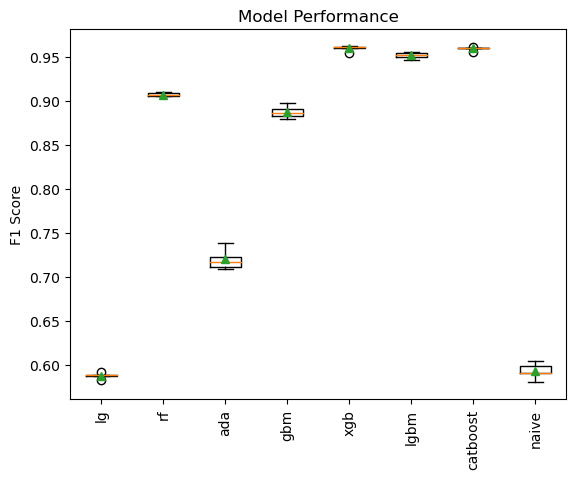

In [150]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('F1 Score')
plt.title('Model Performance')
plt.show()

* **From the above plot i can see that xgb,lgbm and catboost give the best accuracy,so i will combine this 3 model by using stacking classifier and that will be my final model**

In [151]:
# FinalModel - xgb,lgbm,Catboost

base = [('xgb',XGBClassifier()),('lgbm',LGBMClassifier())]
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv = cv)


In [153]:
pred_stack = stack.fit(smote_x,smote_y).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.5234653	total: 208ms	remaining: 3m 27s
1:	learn: 0.4225073	total: 231ms	remaining: 1m 55s
2:	learn: 0.3557653	total: 259ms	remaining: 1m 26s
3:	learn: 0.3047756	total: 284ms	remaining: 1m 10s
4:	learn: 0.2631103	total: 314ms	remaining: 1m 2s
5:	learn: 0.2328262	total: 339ms	remaining: 56.1s
6:	learn: 0.2117823	total: 368ms	remaining: 52.2s
7:	learn: 0.1934212	total: 398ms	remaining: 49.4s
8:	learn: 0.1807901	total: 431ms	remaining: 47.5s
9:	learn: 0.1706862	total: 464ms	remaining: 46s
10:	learn: 0.1634893	total: 487ms	remaining: 43.8s
11:	learn: 0.1568915	total: 510ms	remaining: 42s
12:	learn: 0.1520401	total: 533ms	remaining: 40.5s
13:	learn: 0.1484202	total: 555ms	remaining: 39.1s
14:	learn: 0.1448863	total: 579ms	remaining: 38s
15:	learn: 0.1419891	total: 600ms	remaining: 36.9s
16:	learn: 0.1400423	total: 620ms	remaining: 35.9s
17:	learn: 0.1379850	total: 646ms	remaining: 35.3s
18:	learn: 0.1366447	total: 692ms	remaining: 35.7s
19:	learn: 0.

165:	learn: 0.1271593	total: 4.33s	remaining: 21.7s
166:	learn: 0.1271455	total: 4.35s	remaining: 21.7s
167:	learn: 0.1271377	total: 4.39s	remaining: 21.7s
168:	learn: 0.1271206	total: 4.41s	remaining: 21.7s
169:	learn: 0.1271050	total: 4.44s	remaining: 21.7s
170:	learn: 0.1270949	total: 4.46s	remaining: 21.6s
171:	learn: 0.1270895	total: 4.49s	remaining: 21.6s
172:	learn: 0.1270737	total: 4.51s	remaining: 21.6s
173:	learn: 0.1270609	total: 4.54s	remaining: 21.6s
174:	learn: 0.1270510	total: 4.57s	remaining: 21.5s
175:	learn: 0.1270269	total: 4.59s	remaining: 21.5s
176:	learn: 0.1270094	total: 4.62s	remaining: 21.5s
177:	learn: 0.1269850	total: 4.64s	remaining: 21.4s
178:	learn: 0.1269707	total: 4.67s	remaining: 21.4s
179:	learn: 0.1269615	total: 4.7s	remaining: 21.4s
180:	learn: 0.1269442	total: 4.72s	remaining: 21.4s
181:	learn: 0.1269303	total: 4.75s	remaining: 21.4s
182:	learn: 0.1269094	total: 4.78s	remaining: 21.3s
183:	learn: 0.1268998	total: 4.8s	remaining: 21.3s
184:	learn: 0.

325:	learn: 0.1254420	total: 8.58s	remaining: 17.7s
326:	learn: 0.1254310	total: 8.62s	remaining: 17.7s
327:	learn: 0.1254137	total: 8.64s	remaining: 17.7s
328:	learn: 0.1254011	total: 8.66s	remaining: 17.7s
329:	learn: 0.1253922	total: 8.69s	remaining: 17.6s
330:	learn: 0.1253922	total: 8.71s	remaining: 17.6s
331:	learn: 0.1253780	total: 8.73s	remaining: 17.6s
332:	learn: 0.1253730	total: 8.76s	remaining: 17.5s
333:	learn: 0.1253683	total: 8.79s	remaining: 17.5s
334:	learn: 0.1253592	total: 8.82s	remaining: 17.5s
335:	learn: 0.1253591	total: 8.84s	remaining: 17.5s
336:	learn: 0.1253425	total: 8.87s	remaining: 17.4s
337:	learn: 0.1253293	total: 8.89s	remaining: 17.4s
338:	learn: 0.1253243	total: 8.92s	remaining: 17.4s
339:	learn: 0.1253135	total: 8.94s	remaining: 17.4s
340:	learn: 0.1253035	total: 8.97s	remaining: 17.3s
341:	learn: 0.1252953	total: 9s	remaining: 17.3s
342:	learn: 0.1252867	total: 9.03s	remaining: 17.3s
343:	learn: 0.1252785	total: 9.06s	remaining: 17.3s
344:	learn: 0.1

487:	learn: 0.1242895	total: 12.8s	remaining: 13.5s
488:	learn: 0.1242794	total: 12.9s	remaining: 13.4s
489:	learn: 0.1242675	total: 12.9s	remaining: 13.4s
490:	learn: 0.1242623	total: 12.9s	remaining: 13.4s
491:	learn: 0.1242599	total: 12.9s	remaining: 13.4s
492:	learn: 0.1242538	total: 13s	remaining: 13.3s
493:	learn: 0.1242510	total: 13s	remaining: 13.3s
494:	learn: 0.1242429	total: 13s	remaining: 13.3s
495:	learn: 0.1242429	total: 13s	remaining: 13.3s
496:	learn: 0.1242400	total: 13.1s	remaining: 13.2s
497:	learn: 0.1242341	total: 13.1s	remaining: 13.2s
498:	learn: 0.1242304	total: 13.1s	remaining: 13.2s
499:	learn: 0.1242243	total: 13.1s	remaining: 13.1s
500:	learn: 0.1242054	total: 13.2s	remaining: 13.1s
501:	learn: 0.1241990	total: 13.2s	remaining: 13.1s
502:	learn: 0.1241912	total: 13.2s	remaining: 13.1s
503:	learn: 0.1241910	total: 13.2s	remaining: 13s
504:	learn: 0.1241826	total: 13.3s	remaining: 13s
505:	learn: 0.1241731	total: 13.3s	remaining: 13s
506:	learn: 0.1241614	tota

647:	learn: 0.1232617	total: 18s	remaining: 9.77s
648:	learn: 0.1232618	total: 18s	remaining: 9.74s
649:	learn: 0.1232569	total: 18.1s	remaining: 9.73s
650:	learn: 0.1232514	total: 18.1s	remaining: 9.71s
651:	learn: 0.1232474	total: 18.2s	remaining: 9.69s
652:	learn: 0.1232331	total: 18.2s	remaining: 9.67s
653:	learn: 0.1232235	total: 18.2s	remaining: 9.65s
654:	learn: 0.1232214	total: 18.3s	remaining: 9.64s
655:	learn: 0.1232215	total: 18.3s	remaining: 9.62s
656:	learn: 0.1232213	total: 18.4s	remaining: 9.6s
657:	learn: 0.1232168	total: 18.5s	remaining: 9.59s
658:	learn: 0.1232032	total: 18.5s	remaining: 9.57s
659:	learn: 0.1231972	total: 18.5s	remaining: 9.55s
660:	learn: 0.1231843	total: 18.6s	remaining: 9.52s
661:	learn: 0.1231746	total: 18.6s	remaining: 9.5s
662:	learn: 0.1231746	total: 18.6s	remaining: 9.47s
663:	learn: 0.1231692	total: 18.7s	remaining: 9.45s
664:	learn: 0.1231650	total: 18.7s	remaining: 9.42s
665:	learn: 0.1231617	total: 18.7s	remaining: 9.39s
666:	learn: 0.1231

807:	learn: 0.1223899	total: 22.9s	remaining: 5.45s
808:	learn: 0.1223813	total: 23s	remaining: 5.42s
809:	learn: 0.1223813	total: 23s	remaining: 5.39s
810:	learn: 0.1223716	total: 23s	remaining: 5.36s
811:	learn: 0.1223637	total: 23s	remaining: 5.33s
812:	learn: 0.1223637	total: 23.1s	remaining: 5.3s
813:	learn: 0.1223636	total: 23.1s	remaining: 5.27s
814:	learn: 0.1223636	total: 23.1s	remaining: 5.24s
815:	learn: 0.1223636	total: 23.1s	remaining: 5.21s
816:	learn: 0.1223562	total: 23.2s	remaining: 5.19s
817:	learn: 0.1223467	total: 23.2s	remaining: 5.17s
818:	learn: 0.1223408	total: 23.3s	remaining: 5.14s
819:	learn: 0.1223350	total: 23.3s	remaining: 5.12s
820:	learn: 0.1223286	total: 23.3s	remaining: 5.09s
821:	learn: 0.1223144	total: 23.4s	remaining: 5.06s
822:	learn: 0.1223109	total: 23.4s	remaining: 5.04s
823:	learn: 0.1223109	total: 23.5s	remaining: 5.01s
824:	learn: 0.1223079	total: 23.5s	remaining: 4.98s
825:	learn: 0.1222967	total: 23.5s	remaining: 4.95s
826:	learn: 0.1222880

967:	learn: 0.1216432	total: 27.2s	remaining: 900ms
968:	learn: 0.1216395	total: 27.3s	remaining: 872ms
969:	learn: 0.1216276	total: 27.3s	remaining: 844ms
970:	learn: 0.1216253	total: 27.3s	remaining: 816ms
971:	learn: 0.1216237	total: 27.3s	remaining: 788ms
972:	learn: 0.1216237	total: 27.4s	remaining: 759ms
973:	learn: 0.1216226	total: 27.4s	remaining: 731ms
974:	learn: 0.1216197	total: 27.4s	remaining: 703ms
975:	learn: 0.1216160	total: 27.4s	remaining: 675ms
976:	learn: 0.1216118	total: 27.5s	remaining: 647ms
977:	learn: 0.1216101	total: 27.5s	remaining: 618ms
978:	learn: 0.1216075	total: 27.5s	remaining: 590ms
979:	learn: 0.1216008	total: 27.6s	remaining: 562ms
980:	learn: 0.1215929	total: 27.6s	remaining: 534ms
981:	learn: 0.1215929	total: 27.6s	remaining: 506ms
982:	learn: 0.1215838	total: 27.6s	remaining: 478ms
983:	learn: 0.1215735	total: 27.7s	remaining: 450ms
984:	learn: 0.1215671	total: 27.7s	remaining: 422ms
985:	learn: 0.1215599	total: 27.7s	remaining: 393ms
986:	learn: 

In [154]:
submission['is_claim'] = pred_stack
submission.to_csv('FinalStakingmodel.csv',index=False)

In [155]:
cboost = CatBoostClassifier(scale_pos_weight= 10)
pred_cataboost = cboost.fit(smote_x,smote_y).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.6238989	total: 41.2ms	remaining: 41.1s
1:	learn: 0.5661493	total: 82.2ms	remaining: 41s
2:	learn: 0.5202245	total: 123ms	remaining: 41s
3:	learn: 0.4824852	total: 162ms	remaining: 40.4s
4:	learn: 0.4514433	total: 205ms	remaining: 40.9s
5:	learn: 0.4251651	total: 249ms	remaining: 41.2s
6:	learn: 0.4012833	total: 289ms	remaining: 41s
7:	learn: 0.3828132	total: 329ms	remaining: 40.8s
8:	learn: 0.3670227	total: 367ms	remaining: 40.4s
9:	learn: 0.3552997	total: 407ms	remaining: 40.3s
10:	learn: 0.3443298	total: 455ms	remaining: 40.9s
11:	learn: 0.3354605	total: 498ms	remaining: 41s
12:	learn: 0.3272732	total: 537ms	remaining: 40.7s
13:	learn: 0.3199317	total: 574ms	remaining: 40.4s
14:	learn: 0.3144407	total: 611ms	remaining: 40.1s
15:	learn: 0.3094958	total: 648ms	remaining: 39.8s
16:	learn: 0.3027982	total: 688ms	remaining: 39.8s
17:	learn: 0.2997383	total: 734ms	remaining: 40s
18:	learn: 0.2970893	total: 772ms	remaining: 39.9s
19:	learn: 0.294390

164:	learn: 0.1718238	total: 7.74s	remaining: 39.2s
165:	learn: 0.1717383	total: 7.78s	remaining: 39.1s
166:	learn: 0.1715864	total: 7.82s	remaining: 39s
167:	learn: 0.1714925	total: 7.86s	remaining: 38.9s
168:	learn: 0.1713558	total: 7.9s	remaining: 38.8s
169:	learn: 0.1711292	total: 7.94s	remaining: 38.8s
170:	learn: 0.1710618	total: 7.98s	remaining: 38.7s
171:	learn: 0.1699679	total: 8.03s	remaining: 38.6s
172:	learn: 0.1690743	total: 8.07s	remaining: 38.6s
173:	learn: 0.1675252	total: 8.11s	remaining: 38.5s
174:	learn: 0.1673979	total: 8.15s	remaining: 38.4s
175:	learn: 0.1672587	total: 8.19s	remaining: 38.3s
176:	learn: 0.1670755	total: 8.23s	remaining: 38.3s
177:	learn: 0.1663222	total: 8.27s	remaining: 38.2s
178:	learn: 0.1657008	total: 8.31s	remaining: 38.1s
179:	learn: 0.1650635	total: 8.35s	remaining: 38s
180:	learn: 0.1649497	total: 8.39s	remaining: 38s
181:	learn: 0.1648039	total: 8.43s	remaining: 37.9s
182:	learn: 0.1638293	total: 8.47s	remaining: 37.8s
183:	learn: 0.16369

327:	learn: 0.1296320	total: 14.6s	remaining: 29.8s
328:	learn: 0.1295022	total: 14.6s	remaining: 29.8s
329:	learn: 0.1293976	total: 14.6s	remaining: 29.7s
330:	learn: 0.1293062	total: 14.7s	remaining: 29.7s
331:	learn: 0.1290529	total: 14.7s	remaining: 29.6s
332:	learn: 0.1289930	total: 14.8s	remaining: 29.6s
333:	learn: 0.1288832	total: 14.8s	remaining: 29.5s
334:	learn: 0.1287910	total: 14.8s	remaining: 29.4s
335:	learn: 0.1286924	total: 14.9s	remaining: 29.4s
336:	learn: 0.1286111	total: 14.9s	remaining: 29.3s
337:	learn: 0.1285149	total: 15s	remaining: 29.3s
338:	learn: 0.1282768	total: 15s	remaining: 29.3s
339:	learn: 0.1278880	total: 15.1s	remaining: 29.2s
340:	learn: 0.1276568	total: 15.1s	remaining: 29.2s
341:	learn: 0.1275938	total: 15.1s	remaining: 29.1s
342:	learn: 0.1275173	total: 15.2s	remaining: 29.1s
343:	learn: 0.1274414	total: 15.2s	remaining: 29s
344:	learn: 0.1272456	total: 15.3s	remaining: 29s
345:	learn: 0.1271568	total: 15.3s	remaining: 29s
346:	learn: 0.1269642	

490:	learn: 0.1163140	total: 21s	remaining: 21.7s
491:	learn: 0.1162712	total: 21s	remaining: 21.7s
492:	learn: 0.1162365	total: 21.1s	remaining: 21.7s
493:	learn: 0.1161933	total: 21.1s	remaining: 21.6s
494:	learn: 0.1161560	total: 21.1s	remaining: 21.6s
495:	learn: 0.1161046	total: 21.2s	remaining: 21.5s
496:	learn: 0.1160445	total: 21.2s	remaining: 21.5s
497:	learn: 0.1160135	total: 21.3s	remaining: 21.4s
498:	learn: 0.1159862	total: 21.3s	remaining: 21.4s
499:	learn: 0.1159604	total: 21.3s	remaining: 21.3s
500:	learn: 0.1159174	total: 21.4s	remaining: 21.3s
501:	learn: 0.1158741	total: 21.4s	remaining: 21.2s
502:	learn: 0.1156343	total: 21.4s	remaining: 21.2s
503:	learn: 0.1155762	total: 21.5s	remaining: 21.1s
504:	learn: 0.1153857	total: 21.5s	remaining: 21.1s
505:	learn: 0.1153281	total: 21.6s	remaining: 21s
506:	learn: 0.1152806	total: 21.6s	remaining: 21s
507:	learn: 0.1152477	total: 21.6s	remaining: 20.9s
508:	learn: 0.1151820	total: 21.7s	remaining: 20.9s
509:	learn: 0.115149

650:	learn: 0.1082788	total: 27.2s	remaining: 14.6s
651:	learn: 0.1082288	total: 27.2s	remaining: 14.5s
652:	learn: 0.1081887	total: 27.3s	remaining: 14.5s
653:	learn: 0.1081645	total: 27.3s	remaining: 14.5s
654:	learn: 0.1081324	total: 27.4s	remaining: 14.4s
655:	learn: 0.1080810	total: 27.4s	remaining: 14.4s
656:	learn: 0.1080608	total: 27.4s	remaining: 14.3s
657:	learn: 0.1080281	total: 27.5s	remaining: 14.3s
658:	learn: 0.1079700	total: 27.5s	remaining: 14.2s
659:	learn: 0.1079261	total: 27.5s	remaining: 14.2s
660:	learn: 0.1078913	total: 27.6s	remaining: 14.1s
661:	learn: 0.1078602	total: 27.6s	remaining: 14.1s
662:	learn: 0.1078129	total: 27.7s	remaining: 14.1s
663:	learn: 0.1077808	total: 27.7s	remaining: 14s
664:	learn: 0.1077332	total: 27.7s	remaining: 14s
665:	learn: 0.1077084	total: 27.8s	remaining: 13.9s
666:	learn: 0.1076812	total: 27.8s	remaining: 13.9s
667:	learn: 0.1076233	total: 27.8s	remaining: 13.8s
668:	learn: 0.1075838	total: 27.9s	remaining: 13.8s
669:	learn: 0.10

810:	learn: 0.1020572	total: 33.3s	remaining: 7.77s
811:	learn: 0.1020259	total: 33.4s	remaining: 7.73s
812:	learn: 0.1019872	total: 33.4s	remaining: 7.69s
813:	learn: 0.1019377	total: 33.5s	remaining: 7.65s
814:	learn: 0.1019173	total: 33.5s	remaining: 7.6s
815:	learn: 0.1018971	total: 33.5s	remaining: 7.56s
816:	learn: 0.1017732	total: 33.6s	remaining: 7.52s
817:	learn: 0.1017177	total: 33.6s	remaining: 7.48s
818:	learn: 0.1016997	total: 33.7s	remaining: 7.44s
819:	learn: 0.1016611	total: 33.7s	remaining: 7.39s
820:	learn: 0.1016304	total: 33.7s	remaining: 7.35s
821:	learn: 0.1016030	total: 33.8s	remaining: 7.31s
822:	learn: 0.1015617	total: 33.8s	remaining: 7.27s
823:	learn: 0.1015495	total: 33.8s	remaining: 7.23s
824:	learn: 0.1015188	total: 33.9s	remaining: 7.19s
825:	learn: 0.1014916	total: 33.9s	remaining: 7.15s
826:	learn: 0.1014533	total: 34s	remaining: 7.1s
827:	learn: 0.1014184	total: 34s	remaining: 7.06s
828:	learn: 0.1013955	total: 34s	remaining: 7.02s
829:	learn: 0.101353

972:	learn: 0.0970991	total: 39.5s	remaining: 1.1s
973:	learn: 0.0970827	total: 39.6s	remaining: 1.06s
974:	learn: 0.0970520	total: 39.6s	remaining: 1.01s
975:	learn: 0.0970262	total: 39.6s	remaining: 975ms
976:	learn: 0.0969970	total: 39.7s	remaining: 934ms
977:	learn: 0.0969807	total: 39.7s	remaining: 894ms
978:	learn: 0.0969686	total: 39.8s	remaining: 853ms
979:	learn: 0.0969467	total: 39.8s	remaining: 812ms
980:	learn: 0.0969076	total: 39.8s	remaining: 772ms
981:	learn: 0.0968829	total: 39.9s	remaining: 731ms
982:	learn: 0.0968601	total: 39.9s	remaining: 690ms
983:	learn: 0.0968239	total: 39.9s	remaining: 650ms
984:	learn: 0.0968033	total: 40s	remaining: 609ms
985:	learn: 0.0967668	total: 40s	remaining: 568ms
986:	learn: 0.0967242	total: 40.1s	remaining: 528ms
987:	learn: 0.0966989	total: 40.1s	remaining: 487ms
988:	learn: 0.0966879	total: 40.1s	remaining: 447ms
989:	learn: 0.0966741	total: 40.2s	remaining: 406ms
990:	learn: 0.0966500	total: 40.2s	remaining: 365ms
991:	learn: 0.096

In [156]:
submission['is_claim'] = pred_cataboost
submission.to_csv('CatboostModel.csv',index=False)

* **Catboost model best accuracy** 
* **I am go with Catboost Model** 